In [12]:
import qiskit_nature
from qiskit_algorithms.optimizers import *
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q import *
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer.noise import NoiseModel
from qiskit_nature.exceptions import QiskitNatureError
import matplotlib.pyplot as plt
import numpy as np
import time
import scienceplots

In [8]:
def h2_padrao(d, optimizer, mapper = BravyiKitaevMapper()):

    driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 {d}", basis="sto-3g")
    estrutura_otimizada = driver.run() #Criamos a estrutura do nosso sistema

    ansatz = UCCSD(
        estrutura_otimizada.num_spatial_orbitals,
        estrutura_otimizada.num_particles,
        mapper,
        initial_state = HartreeFock(
            estrutura_otimizada.num_spatial_orbitals,
            estrutura_otimizada.num_particles,
            mapper))


    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters
    calculo = GroundStateEigensolver(mapper, vqe_solver)
    resultados = calculo.solve(estrutura_otimizada)

    return resultados.groundenergy + resultados.nuclear_repulsion_energy

In [17]:
otimizadores = [SLSQP(), COBYLA(), SPSA(), NELDER_MEAD(), AQGD(), P_BFGS()]
labels = ['SLSQP', 'COBYLA', 'SPSA', 'NELDER_MEAD', 'AQGD', 'F_BFGS']
tempos = []
energias = []

intervalo = np.concatenate((np.linspace(0.3,1.5,10), np.linspace(1.6,4,5)))

for i in otimizadores:
    ti = time.time()
    aux = [h2_padrao(a, i) for a in intervalo]
    tf = time.time()
    tempos.append(tf-ti)
    energias.append(aux)

In [ ]:
import pandas as pd

energies = {'distancia': intervalo,
        'SLSQP': energias[0],
        'Cobyla': energias[1],
        'SPSA': energias[2],
        'NELDER_MEAD': energias[3],
        'AQGD': energias[4],
        'F_BFGS': energias[5]}

dados = pd.DataFrame(energies)
dados.to_csv('Dados dos otimizadores.csv', index = False)

In [8]:
import pandas as pd

In [10]:
tempos_df

NameError: name 'tempos_df' is not defined

In [15]:
tempos = {'SLSQP': [17.756882667541504],
        'Cobyla': [104.46136164665222],
        'SPSA': [163.19167613983154],
        'NELDER_MEAD': [137.877947807312],
        'AQGD': [10.746630668640137],
        'F_BFGS': [103.80209684371948]}
tempos_df = pd.DataFrame(tempos)
tempos_df.to_csv('Valores de tempo para otimizadores.csv', index=False)

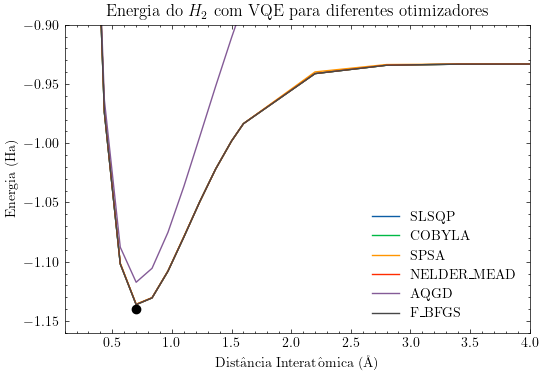

In [57]:
plt.style.use('science')

aux = plt.figure()

aux.set_figwidth(6)
aux.set_figheight(4)

for i in range(len(labels)):
    plt.plot(intervalo, energias[i], label = labels[i])

plt.plot(0.7,-1.14,'o', color='black')

plt.xlim(0.1,4)
plt.ylim(-1.16,-0.9)
plt.legend()
plt.title('Energia do $H_2$ com VQE para diferentes otimizadores')
plt.xlabel('Distância Interatômica (Å)')
plt.ylabel('Energia (Ha)')
plt.show()

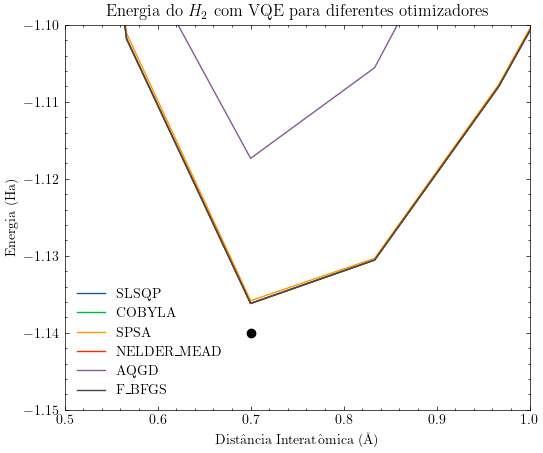

In [59]:
plt.style.use('science')

aux = plt.figure()

aux.set_figwidth(6)
aux.set_figheight(5)

for i in range(len(labels)):
    plt.plot(intervalo, energias[i], label = labels[i])

plt.plot(0.7,-1.14,'o', color='black')

plt.xlim(0.5,1)
plt.ylim(-1.15,-1.1)
plt.title('Energia do $H_2$ com VQE para diferentes otimizadores')
plt.xlabel('Distância Interatômica (Å)')
plt.ylabel('Energia (Ha)')
plt.legend()
plt.show()

In [64]:
import pandas as pd

energies = {'distancia': intervalo,
        'SLSQP': energias[0],
        'Cobyla': energias[1],
        'SPSA': energias[2],
        'NELDER_MEAD': energias[3],
        'AQGD': energias[4],
        'F_BFGS': energias[5]}

dados = pd.DataFrame(energies)
dados.to_csv('Dados dos otimizadores.csv', index = False)